Read And load the raw data in a dataframe

In [ ]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
eeg_df = pd.read_csv('RAW_eeg_data.csv')

take a information about the head of the dataframe

In [2]:
eeg_df.head()

,Electrode,T1,T2,T3,T4,T5,T6,T7,T8,T9,...,T1016,T1017,T1018,T1019,T1020,T1021,T1022,T1023,T1024,Condition
0,C3,-2.90680,-6.69830,-5.75040,-2.90680,-1.95890,-0.06319,-1.0111,-4.80250,-3.85470,...,6.5719,2.7804,-0.06319,-0.06319,-0.06319,-0.06319,-1.0111,-1.95890,-2.9068,AD
1,C4,-0.88889,-2.79370,-5.65080,-4.69840,-1.84130,1.01590,1.0159,-2.79370,-2.79370,...,4.8254,2.9206,0.06349,-1.84130,-3.74600,-3.74600,-1.8413,0.06349,1.9683,AD
2,Cz,-6.82930,-8.78050,-6.82930,-2.92680,0.00000,0.00000,-2.9268,-5.85370,-2.92680,...,3.9024,2.9268,0.97561,0.00000,0.97561,0.97561,0.0000,-1.95120,-1.9512,AD
3,F1,1.92310,0.96154,0.96154,0.96154,0.96154,2.88460,2.8846,-0.96154,0.00000,...,12.5000,7.6923,2.88460,1.92310,-1.92310,-2.88460,-2.8846,-3.84620,-4.8077,AD
4,F2,0.00000,-2.94120,-1.96080,-0.98039,1.96080,2.94120,5.8824,1.96080,0.98039,...,12.7450,11.7650,6.86270,7.84310,3.92160,3.92160,2.9412,3.92160,3.9216,AD


encoding the 'Electrode' feature (or any categorical feature) into numeric values using
LabelEncoder is that machine learning models, such as Decision Trees and Random Forests,
require numerical inputs to perform calculations.

In [4]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
eeg_df['Electrode'] = label_encoder.fit_transform(eeg_df['Electrode'])

 Prepare features (X) and target (y)

In [26]:
X = eeg_df.drop(columns=['Condition'])  
y = eeg_df['Condition'] 
# Encode the 'Condition' labels (AD=1, Healthy=0)
y = LabelEncoder().fit_transform(y)
feature_names = X.columns.tolist() 
print("Feature Names:", feature_names)

Feature Names: ['Electrode', 'T1', 'T2', 'T3', 'T4', 'T5', 'T6', 'T7', 'T8', 'T9', 'T10', 'T11', 'T12', 'T13', 'T14', 'T15', 'T16', 'T17', 'T18', 'T19', 'T20', 'T21', 'T22', 'T23', 'T24', 'T25', 'T26', 'T27', 'T28', 'T29', 'T30', 'T31', 'T32', 'T33', 'T34', 'T35', 'T36', 'T37', 'T38', 'T39', 'T40', 'T41', 'T42', 'T43', 'T44', 'T45', 'T46', 'T47', 'T48', 'T49', 'T50', 'T51', 'T52', 'T53', 'T54', 'T55', 'T56', 'T57', 'T58', 'T59', 'T60', 'T61', 'T62', 'T63', 'T64', 'T65', 'T66', 'T67', 'T68', 'T69', 'T70', 'T71', 'T72', 'T73', 'T74', 'T75', 'T76', 'T77', 'T78', 'T79', 'T80', 'T81', 'T82', 'T83', 'T84', 'T85', 'T86', 'T87', 'T88', 'T89', 'T90', 'T91', 'T92', 'T93', 'T94', 'T95', 'T96', 'T97', 'T98', 'T99', 'T100', 'T101', 'T102', 'T103', 'T104', 'T105', 'T106', 'T107', 'T108', 'T109', 'T110', 'T111', 'T112', 'T113', 'T114', 'T115', 'T116', 'T117', 'T118', 'T119', 'T120', 'T121', 'T122', 'T123', 'T124', 'T125', 'T126', 'T127', 'T128', 'T129', 'T130', 'T131', 'T132', 'T133', 'T134', 'T135',

divide data into 30% test and 70% train 

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.3, random_state=3)

Now lets Apply the decison tree process : 

In [58]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state=0)
dt.fit(X_train.values, Y_train)
unique, counts = np.unique(Y_train, return_counts=True)

# Create a dictionary to display the counts
count_dict = dict(zip(unique, counts))
print("Counts of each class label:", count_dict)

Counts of each class label: {np.int64(0): np.int64(2365), np.int64(1): np.int64(323)}


Lets Predict via decision tree

In [45]:
prediction = dt.predict(X_test.values)

In [44]:
x_new = X_test.iloc[0].values.reshape(1, -1)
prediction = dt.predict(x_new)
print("Prediction for test example:", prediction)

Prediction for test example: [0]


Plot the decision tree elaborated 

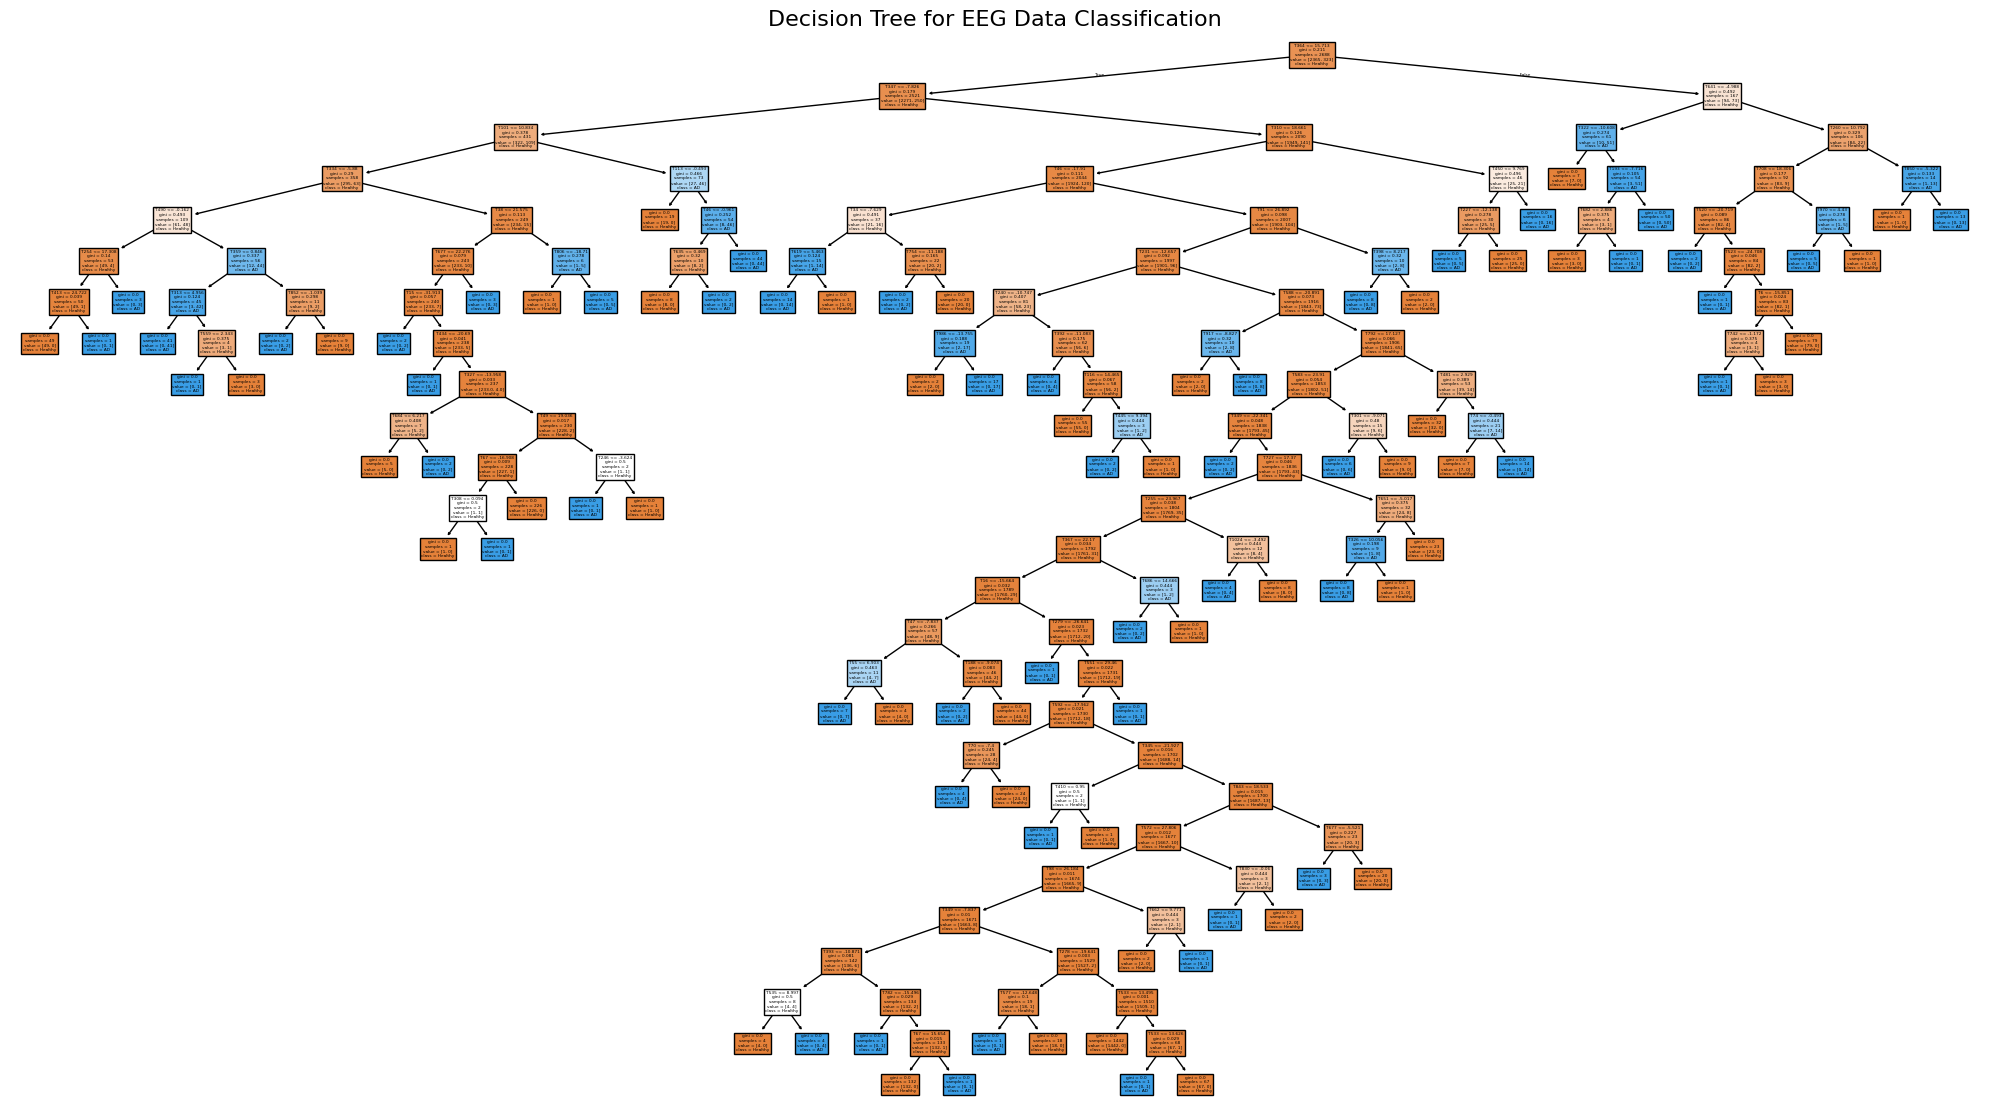

In [46]:
from sklearn.tree import plot_tree, export_text
# Plot the decision tree
plt.figure(figsize=(20, 11.25))  # Full HD aspect ratio 16:9
plot_tree(dt, feature_names=X.columns, class_names=['Healthy', 'AD'], filled=True)
plt.title("Decision Tree for EEG Data Classification", fontsize=16)
plt.tight_layout()  # Adjust layout to fit the figure nicely
plt.show()

Plot the tree by text (not graphic ) 

In [49]:
tree_rules = export_text(dt, feature_names=list(X.columns))
print(tree_rules)

|--- T364 <= 15.71
|   |--- T347 <= -7.83
|   |   |--- T101 <= 10.83
|   |   |   |--- T334 <= -5.88
|   |   |   |   |--- T490 <= -0.16
|   |   |   |   |   |--- T254 <= 17.31
|   |   |   |   |   |   |--- T413 <= 24.72
|   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |--- T413 >  24.72
|   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |--- T254 >  17.31
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |--- T490 >  -0.16
|   |   |   |   |   |--- T359 <= 0.85
|   |   |   |   |   |   |--- T313 <= 4.96
|   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |--- T313 >  4.96
|   |   |   |   |   |   |   |--- T559 <= 2.34
|   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |   |--- T559 >  2.34
|   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |--- T359 >  0.85
|   |   |   |   |   |   |--- T852 <= -1.04
|   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |--- T852 >  -1.04
|   |   |   |   |   |   |   |-

In [53]:
from sklearn.model_selection import GridSearchCV
param_grid = {'criterion': ['gini', 'entropy'], 'max_depth': range(1, 10)}
grid = GridSearchCV(DecisionTreeClassifier(random_state=0), param_grid, cv=5)
grid.fit(X_train, Y_train)
print("Best hyperparameters:", grid.best_params_)


Best hyperparameters: {'criterion': 'entropy', 'max_depth': 7}


In [60]:
# Final Decision Tree model with best hyperparameters
dt = DecisionTreeClassifier(criterion='entropy', max_depth=7, random_state=0)
dt.fit(X_train.values, Y_train)
print('Test score:', dt.score(X_test.values, Y_test))

Test score: 0.9193408499566349


In [ ]:

# Plot the optimized decision tree
plt.figure(figsize=(20, 10))
plot_tree(dt, feature_names=X.columns, class_names=['Healthy', 'AD'], filled=True)
plt.show()



Random Forest 

In [65]:
from sklearn.ensemble import RandomForestClassifier
rf_classifier = RandomForestClassifier(max_depth=8, n_estimators=50, criterion='entropy' ,random_state=0)
rf_classifier.fit(X_train.values, Y_train)

# Evaluate the Random Forest model
test_score = rf_classifier.score(X_test.values, Y_test)
train_score = rf_classifier.score(X_train.values, Y_train)
print('Random Forest Test score:', test_score)
print('Random Forest Train score:', train_score)

Random Forest Test score: 0.9436253252385083
Random Forest Train score: 0.9903273809523809


Plot the confusion matrix for that Random forest

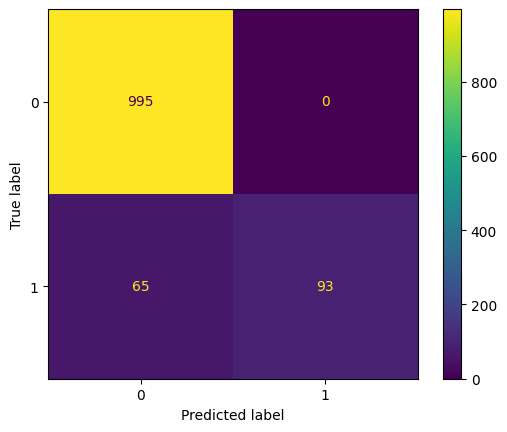

In [67]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
y_pred = rf_classifier.predict(X_test.values)
cm = confusion_matrix(Y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()